# Lumiata Data Science take-home assignment

## This notebook is structured in two parts
###   - The first portion is exploration of the data
###    - The second portion is where to put your code

# Explore the structure of the data first

## Read in train.txt data

In [1]:
import json
from pprint import pprint

ls = []
with open('train.txt') as f:
    for line in f:
        ls.append(json.loads(line))

## Show structure of each patient json
### (key_name, type_of_value_associated_to_key)

In [2]:
pprint(zip(ls[0].keys(), [type(ls[0][x]) for x in ls[0].keys()]))

## Display patient json

In [3]:
pprint(ls[0])

{'bday': '1959-10-10',
 'is_male': False,
 'observations': {'2014-05-21': [{'code': 'loinc_24111-7',
                                  'interpretation': None,
                                  'value': None},
                                 {'code': 'loinc_6356-0',
                                  'interpretation': None,
                                  'value': None}],
                  '2014-10-30': [{'code': 'loinc_20405-7',
                                  'interpretation': 'L',
                                  'value': '0.0'},
                                 {'code': 'loinc_21000-5',
                                  'interpretation': 'N',
                                  'value': '13.0'},
                                 {'code': 'loinc_2514-8',
                                  'interpretation': None,
                                  'value': None},
                                 {'code': 'loinc_25428-4',
                                  'interpretation': None,
      

## Show 'resources' key

In [4]:
pprint(ls[0]['resources'])

{'2014-01-13': [],
 '2014-02-18': [],
 '2014-03-21': [],
 '2014-04-30': [],
 '2014-05-21': ['cpt_99213',
                'icd9_V85.23',
                'cpt_87210',
                'icd9_789.03',
                'cpt_87591',
                'cpt_87491',
                'icd9_616.10'],
 '2014-06-05': [],
 '2014-07-02': ['cpt_99213', 'icd9_789.03', 'icd9_278.02'],
 '2014-07-10': ['cpt_72195', 'icd9_789.09'],
 '2014-07-30': [],
 '2014-08-06': ['cpt_73510', 'icd9_789.03', 'cpt_99213'],
 '2014-08-20': ['icd9_564.00',
                'cpt_99213',
                'cpt_74000',
                'icd9_V85.1',
                'icd9_789.00'],
 '2014-08-27': [],
 '2014-09-06': ['cpt_76856',
                'icd9_789.03',
                'icd9_625.9',
                'cpt_76830',
                'cpt_73721',
                'icd9_719.05'],
 '2014-09-17': ['icd9_V76.12', 'cpt_77057'],
 '2014-09-20': ['icd9_727.9', 'cpt_99213'],
 '2014-09-30': [],
 '2014-10-01': ['cpt_97140', 'icd9_719.45', 'cpt_97110'

## Show 'observations' key

In [5]:
pprint(ls[0]['observations'])

{'2014-05-21': [{'code': 'loinc_24111-7',
                 'interpretation': None,
                 'value': None},
                {'code': 'loinc_6356-0',
                 'interpretation': None,
                 'value': None}],
 '2014-10-30': [{'code': 'loinc_20405-7',
                 'interpretation': 'L',
                 'value': '0.0'},
                {'code': 'loinc_21000-5',
                 'interpretation': 'N',
                 'value': '13.0'},
                {'code': 'loinc_2514-8', 'interpretation': None, 'value': None},
                {'code': 'loinc_25428-4',
                 'interpretation': None,
                 'value': None},
                {'code': 'loinc_26444-0',
                 'interpretation': 'N',
                 'value': '1.0'},
                {'code': 'loinc_26449-9',
                 'interpretation': 'H',
                 'value': '5.0'},
                {'code': 'loinc_26474-7',
                 'interpretation': 'N',
                 'value'

# Fill your code below this line

## 1. Experimental setup/design

## we try to build up a prediction model with a dataset.
### 1. it's a binary classification. It already gives me some sense that we could try logistic regression as baseline. Diabetes prediction (Yes/No)
### 2. It has big chance that the datasets is imbalance therefore I keep in mind, bossting algorithm would be a good choice instead of logit model.
### 3. Because this problem would be more like a detection rather than classification, Precision/Recall would be a suitable metrics at the first glance.
### My workflow would be
### (A) Process data into a format, defining features (feature extraction will be dicussed in the second part) and target variables.
###  (B) model buidling and tuning
###  (C) feature importance and interpretation                    

## 2. Feature design/feature selection

In [6]:
## We should understand the data euther in technical aspect like structure, data type, variation
## or in the meaning, what's the specification, mapping code,etc.
## In brief 1. demorgraphic: gender, birthday which we can convert into age 2.recources 3. observations
## for resources and observation, I'd like to apply marketing customer segments framework RFM into this feature engineering.
### R: Recency: when is the last time the patient did something, we create recency which is how many days between today and the last time the patient, and it's health performance 
### F: Frequency: How many times the patient went to hospital. How days between the first time visit and last time visit
### M: Monetary: What's the average health performance during the first time visit and lat time visit?
### More granular feature: medical code mapping, once I tried to build up a model, one of the top influnetial features is ICD10, therefore, I choose ICD10 and make a mapping, all of the value are startinug with from A-Z,
### therefore I create a icdTenMapping class method.
### In order to keep the mssing, some missing value seems to be not random, 
###for eg, some patients probably went to a hospital but for certian reasons, the health record is missing. most of the time, missing record is not random, therefore I imputed the data with missing features.

In [7]:
from collections import defaultdict
d = defaultdict(list)
disease = set()
for feature in ls:        
    for resource in feature['resources']:
        for item in feature['resources'][resource]:      
            disease.add(item.split('_')[0])
            d[item.split('_')[0]].append(item.split('_')[1])
print(disease)

{'cpt', 'icd10', 'hcpcs', 'icd9'}


In [8]:
!python process_json.py

create Train Data set
Train json file generated and asved at same folder called processed_train_dataset.json
create Test Data set
Test json file generated and asved at same folder called processed_test_dataset.json


In [9]:
import json
import numpy as np
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve,precision_recall_curve
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from lightgbm.sklearn import LGBMClassifier
seed = 11

/Users/dwightliu/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


## 3. Model selection/tuning

### I'd like to try LGBM becaseu of some points.
### 1. This datasets is imbalance datasets. therefore I choose boosting algo.Becasue this modeling is judge by the metrics 'precision-recall curve' and the area under it.
### 2. I imputed with missing value and create lable. Tree model can better handle with nonlinear relationship and correlated features.
### 3. Tree model will return feature importance and I can leverage them to conduct feature selection.
### 4. tree model doesn't need feature scailing and not sensitive to outliers.
## model paramater tuning:
### LGBM complexity is controlled mainly by 'num_leaves', 'min_child_samples', and 'max_depth'. There are still other paramaters which controll like 'bagging_fraction', 'bagging_freq', 'feature_fraction'. But to be simple, we use 'num_leaves', 'min_child_samples', and 'max_depth'
### the default value for 'num_leaves'= 31 'min_child_samples'= 20 and 'max_depth'= -1 (unlimited)

In [10]:
def roc_pr_curve_plot(trained_model, X_train, y_train, X_test, y_test):
    '''
    A customized visualization hanlder
    '''
    fig = plt.figure(figsize=(15,8))
    ax1 = fig.add_subplot(1,2,1)
    ax1.set_xlim([-0.05,1.05])
    ax1.set_ylim([-0.05,1.05])
    ax1.set_xlabel('Recall')
    ax1.set_ylabel('Precision')
    ax1.set_title('PR Curve')

    ax2 = fig.add_subplot(1,2,2)
    ax2.set_xlim([-0.05,1.05])
    ax2.set_ylim([-0.05,1.05])
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve')

    pred_prob = trained_model.predict_proba(X_train)[:,1]

    p_train,r_train,_ = precision_recall_curve(y_train,pred_prob)
    tpr_train,fpr_train,_ = roc_curve(y_train,pred_prob) 

    ax1.plot(r_train,p_train,c='r',label='train')
    ax2.plot(tpr_train,fpr_train,c='r',label='train')

    pred_prob = trained_model.predict_proba(X_test)[:,1]

    p_test,r_test,_ = precision_recall_curve(y_test,pred_prob)
    tpr_test,fpr_test,_ = roc_curve(y_test,pred_prob) 

    ax1.plot(r_test,p_test,c='b',label='test')
    ax2.plot(tpr_test,fpr_test,c='b',label='test')
    ax1.legend(loc='lower left')    
    ax2.legend(loc='lower left')
    return fig

In [11]:
# import processed json data (lists of dictionaries)
with open('processed_train_dataset.json', 'r') as fp:
    data = json.load(fp)

In [12]:
# extract features and target variable
features = data['features']
y = np.array(data['target'])

In [13]:
v = DictVectorizer()
X = v.fit_transform(features)
print('feature space: ',X.shape)
print('target space: ',y.shape)

feature space:  (73503, 57727)
target space:  (73503,)


# Train data split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)

In [15]:
lgbm = LGBMClassifier(class_weight='balanced',random_state=seed)
lgbm.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=11, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

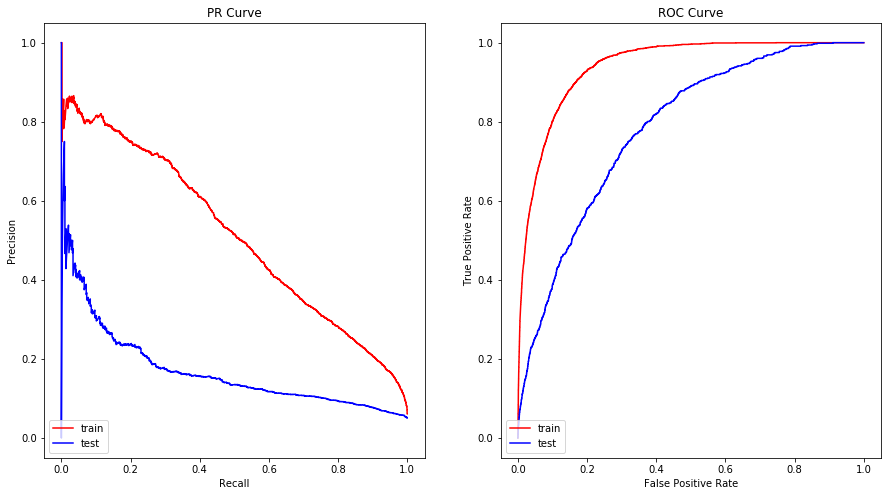

In [16]:
fig = roc_pr_curve_plot(lgbm,X_train,y_train,X_test,y_test)

### we can see that the training curve and testing curve didn't converge the model seems to overfit the data.
### We can try to reduce the features
### Here we used SelectKBest to do feature selection

In [17]:
for k_cols in [500,1000,1500,2000,2500]:
    selectors = SelectKBest(f_classif, k=k_cols).fit(X, y)
    X_s = X[:,selectors.get_support()].copy()
    X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size=0.2, random_state=seed, stratify=y)
    lgbm = LGBMClassifier(class_weight='balanced',random_state=seed)
    lgbm.fit(X_train,y_train)
    pred = lgbm.predict_proba(X_test)[:,1]
    print(k_cols,average_precision_score(y_test,pred))

500 0.17753734924101813
1000 0.16780820824727946
1500 0.1859834409575017
2000 0.1859834409575017
2500 0.1743410973083171


In [18]:
selectors = SelectKBest(f_classif, k=1500).fit(X, y)
X_s = X[:, selectors.get_support()].copy()
X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size=0.2, random_state=seed, stratify=y)

In [19]:
lgbm = LGBMClassifier(class_weight='balanced',random_state=seed)
lgbm.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=11, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

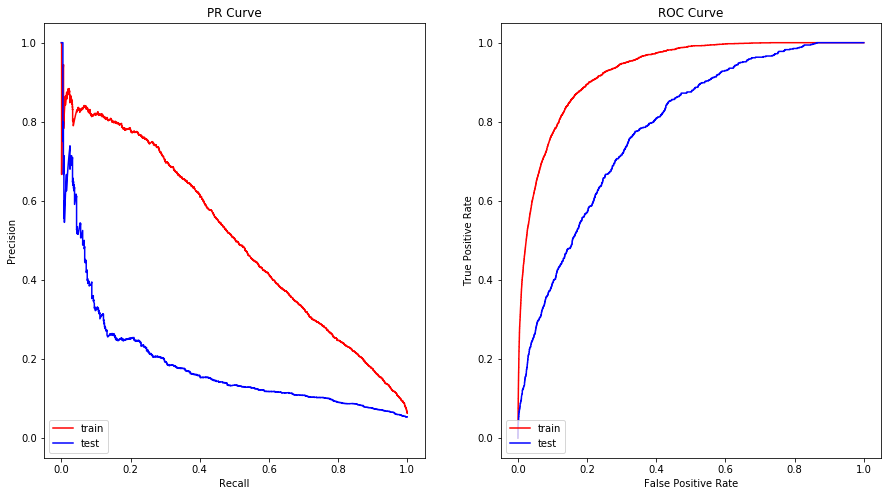

In [20]:
fig = roc_pr_curve_plot(lgbm,X_train,y_train,X_test,y_test)

In [21]:
pred = lgbm.predict(X_test)
print(classification_report(y_test,pred))
pred = lgbm.predict_proba(X_test)[:,1]
print('average precision score: ',average_precision_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.77      0.86     14019
           1       0.12      0.63      0.20       682

    accuracy                           0.76     14701
   macro avg       0.55      0.70      0.53     14701
weighted avg       0.94      0.76      0.83     14701

average precision score:  0.1859834409575017


### we can see that the training curve and testing curve still didn't converge the model still seems to overfit the data.
### therefore we can start to tune paramaters from lowering num_leaves increasing min_child_samples, limiting max_depth

In [22]:
cus_params = {'max_depth': 5, 'min_child_samples': 30, 'num_leaves': 15}
lgbm = LGBMClassifier(class_weight='balanced',random_state=seed,**cus_params)
lgbm.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=5, min_child_samples=30, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=15,
               objective=None, random_state=11, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

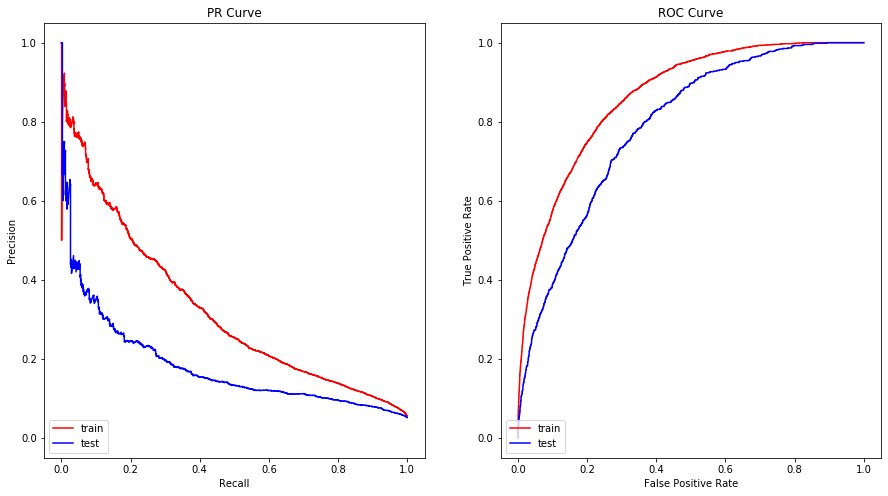

In [23]:
fig = roc_pr_curve_plot(lgbm,X_train,y_train,X_test,y_test)

In [24]:
pred = lgbm.predict(X_test)
print(classification_report(y_test,pred))
pred = lgbm.predict_proba(X_test)[:,1]
print('average precision score: ',average_precision_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.70      0.81     14019
           1       0.11      0.74      0.18       682

    accuracy                           0.70     14701
   macro avg       0.54      0.72      0.50     14701
weighted avg       0.94      0.70      0.78     14701

average precision score:  0.1806919623425406


### we can see that the curves are getting closer to each other, the model tend to better fit the data.

## 4. Model performance evaluation (i.e how well it does along the metrics above)


### now we don't know whether it's a bias data split and we also want to better find the optimal combination of paramaters.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size=0.2, random_state=seed, stratify=y)
model = LGBMClassifier(class_weight='balanced',random_state=seed)
params_opt = {'num_leaves':[14, 15, 16], 
            'max_depth':[4, 5, 6],
            'min_child_samples': [20, 30, 40]}
gridSearchCV = GridSearchCV(estimator = model, 
                            param_grid = params_opt, 
                            scoring='average_precision',
                            n_jobs=-1,
                            iid=False, 
                            verbose=1,
                            cv=5)
gridSearchCV.fit(X_train,y_train)
print('best_params: ',gridSearchCV.best_params_)
print('best_average_precision_score',gridSearchCV.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  2.4min finished


best_params:  {'max_depth': 6, 'min_child_samples': 40, 'num_leaves': 15}
best_average_precision_score 0.18477433472857144


In [26]:
best_params = gridSearchCV.best_params_
print('best paramaters: ', best_params)
print('best average precision score: ',gridSearchCV.best_score_)

best paramaters:  {'max_depth': 6, 'min_child_samples': 40, 'num_leaves': 15}
best average precision score:  0.18477433472857144


In [27]:
lgbm = LGBMClassifier(class_weight='balanced', random_state=seed, **best_params)
lgbm.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=6, min_child_samples=40, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=15,
               objective=None, random_state=11, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

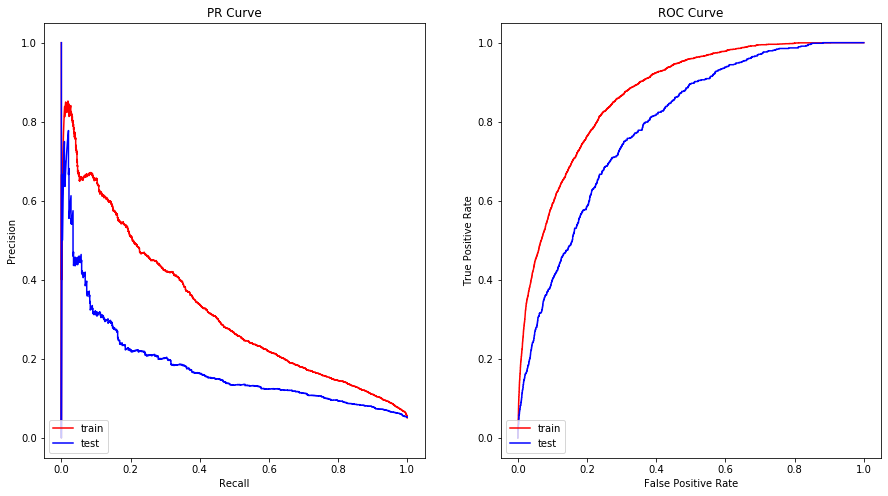

In [28]:
fig = roc_pr_curve_plot(lgbm,X_train, y_train, X_test, y_test)

In [29]:
pred = lgbm.predict(X_test)
print(classification_report(y_test, pred))
pred = lgbm.predict_proba(X_test)[:,1]
print('average precision score: ',average_precision_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.70      0.82     14019
           1       0.11      0.73      0.19       682

    accuracy                           0.71     14701
   macro avg       0.54      0.72      0.50     14701
weighted avg       0.94      0.71      0.79     14701

average precision score:  0.18086460928275963


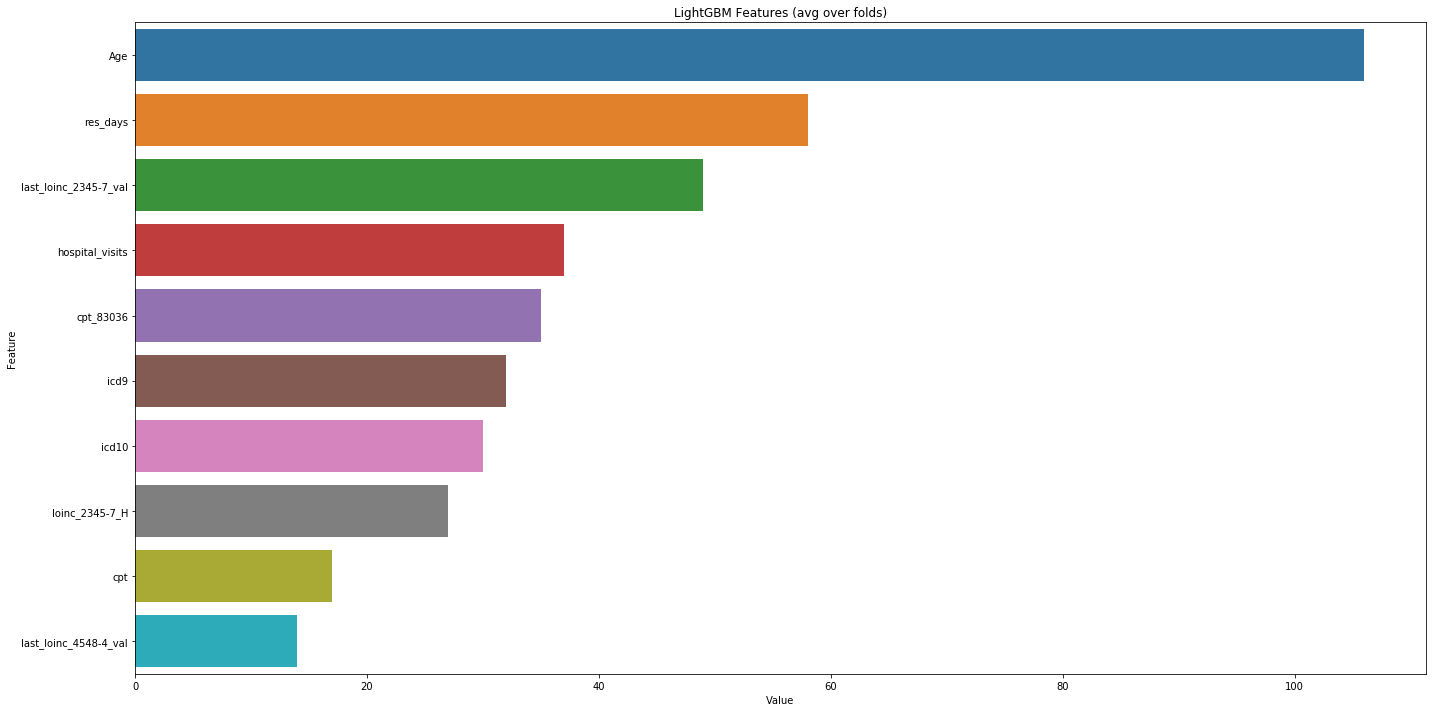

In [30]:
whole_feature_cols = np.array(v.get_feature_names())
selected_feature_cols = whole_feature_cols[selectors.get_support()]
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importances_, selected_feature_cols)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).head(10))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

In [31]:
feature_imp.sort_values(by="Value", ascending=False).head(10)

,Value,Feature
1499,106,Age
1498,58,res_days
1497,49,last_loinc_2345-7_val
1496,37,hospital_visits
1495,35,cpt_83036
1494,32,icd9
1493,30,icd10
1492,27,loinc_2345-7_H
1491,17,cpt
1490,14,last_loinc_4548-4_val


### we can see that the top 5 most influential features are 
### Age: patient's age in year, today's date is 2016-12-31
### res_days: how many days between the first doctor and last doctor visit. it kind of tells us how long this patient keep going to see a doctor.
### last_loinc_2345-7_val: the most recent value of observation for loinc_2345-7 test
### hospital_visits : how many times the patient went to hospital.
### cpt_83036: how many timess the patient gow diagnoised with cpt_83036.

# The Last steps
## Use all of the data to train model

In [32]:
print('Whole of train data feature dimesions: ', X_s.shape)
print('Whole of train data target dimesions: ', y.shape)

Whole of train data feature dimesions:  (73503, 1500)
Whole of train data target dimesions:  (73503,)


In [33]:
lgbm = LGBMClassifier(class_weight='balanced', random_state=seed, **best_params)
lgbm.fit(X_s, y)

LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=6, min_child_samples=40, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=15,
               objective=None, random_state=11, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [34]:
# import processed json data (lists of dictionaries)
with open('processed_test_dataset.json', 'r') as fp:
    test_data = json.load(fp)
# extract features and target variable
test_features = test_data['features']
test_patient_id = np.array(test_data['patient_id'])

In [35]:
test_X = v.transform(test_features)
print('feature space: ',test_X.shape)
print('patient_id space: ',test_patient_id.shape)

feature space:  (31403, 57727)
patient_id space:  (31403,)


In [36]:
# select the features we need based on the RFE method
test_X_s = test_X[:, selectors.get_support()].copy()

In [37]:
print(test_X_s.shape)

(31403, 1500)


In [38]:
test_pred = lgbm.predict_proba(test_X_s)[:,1]
output_data = {'patient_id':list(test_patient_id), 'dm2_prob':list(test_pred)} 
output_df = pd.DataFrame(output_data)

In [39]:
output_df.head(10)

,patient_id,dm2_prob
0,pat_1,0.251030
1,pat_2,0.663659
2,pat_4,0.570407
3,pat_8,0.443706
4,pat_11,0.359476
5,pat_17,0.006002
6,pat_18,0.143928
7,pat_19,0.019428
8,pat_20,0.523495
9,pat_23,0.753685


In [40]:
output_df.to_csv('dwight_dm2_solution.csv', index=False)

In [41]:
check = pd.read_csv('dwight_dm2_solution.csv')

In [42]:
check.head(10)

,patient_id,dm2_prob
0,pat_1,0.251030
1,pat_2,0.663659
2,pat_4,0.570407
3,pat_8,0.443706
4,pat_11,0.359476
5,pat_17,0.006002
6,pat_18,0.143928
7,pat_19,0.019428
8,pat_20,0.523495
9,pat_23,0.753685


## 5. A short write-up (2-3 paragraph) of your approach. Be sure to include the following:
### - Top 5 most important features for predicting diabetes - have a rationale for why you think these are most important
### - Briefly describe the model you used for training
### - Explain how you optimized your model, and what performance metrics you optimized for
### -How did you prevent overfitting?

# Summary: 
## The top 5 features
### Age: patient's age in year, today's date is 2016-12-31
### res_days: how many days between the first doctor and last doctor visit. it kind of tells us how long this patient keep going to see a doctor.
### last_loinc_2345-7_val: the most recent value of observation for loinc_2345-7 test
### hospital_visits : how many times the patient went to hospital.
### cpt_83036: how many timess the patient gow diagnoised with cpt_83036.

## I decided to choose LGBM because 
### 1. This datasets is imbalance datasets. therefore I choose boosting algo.Becasue this modeling is judge by the metrics 'precision-recall curve' and the area under it.
### 2. I imputed with missing value and create lable. Tree model can better handle with nonlinear relationship and correlated features.
### 3. Tree model will return feature importance and I can leverage them to conduct feature selection.
### 4. tree model doesn't need feature scailing and not sensitive to outliers.

## The most important part is feature engineering.
### We can see the top 5 features 2 of them are obtained by feature negineering. The length of the days between the first time and last time
### It seems like the marketing model, RFM analysis helps quite much.
### How to map the medical code is another challenging part. either we can also try to use all of the variation but it will easily oversitting and gives too much granular information.
### If I have more time, I would dig into the mdeical mapping for 'hcpcs', 'cpt', 'icd9'. I believe it would help a lot but it needs quite much time.

## Overfitting prevention
### I used the training/testing curves plot and cross_validation to prevent overfitting. cross validation prevent the bias train'test data split and curves plot tells us the discrepency 
### between traing performance and testing performance based on the targeting metrics

# end of the script